In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
# Warnings
#import warnings
#warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [126]:
data=pd.read_csv('E:\Delhi.csv')
data.fillna(0, inplace=True)
data.head()

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01-01-2018,303.41,415.09,62.76,63.92,11.79,73.16,1.80,18.58,68.75,5.72,14.77,0.24,462,Severe
1,Delhi,02-01-2018,277.48,422.59,31.26,53.73,4.26,55.61,1.52,12.43,68.68,3.98,9.71,0.27,439,Severe
2,Delhi,03-01-2018,217.01,336.87,37.98,52.24,2.87,50.81,1.29,10.28,54.94,3.09,6.60,0.21,405,Severe
3,Delhi,04-01-2018,248.54,377.61,35.56,61.57,4.24,55.17,1.36,14.42,66.31,3.79,8.20,0.39,394,Very Poor
4,Delhi,05-01-2018,240.42,360.99,38.73,54.80,4.57,51.36,1.38,13.20,48.57,3.63,8.14,0.26,398,Very Poor


# Pre-processing of data

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        913 non-null    object 
 1   Date        913 non-null    object 
 2   PM25        913 non-null    float64
 3   PM10        913 non-null    float64
 4   NO          913 non-null    float64
 5   NO2         913 non-null    float64
 6   NOx         913 non-null    float64
 7   NH3         913 non-null    float64
 8   CO          913 non-null    float64
 9   SO2         913 non-null    float64
 10  O3          913 non-null    float64
 11  Benzene     913 non-null    float64
 12  Toluene     913 non-null    float64
 13  Xylene      913 non-null    float64
 14  AQI         913 non-null    int64  
 15  AQI_Bucket  913 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 114.2+ KB


In [128]:
data.describe()

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,913.000000,913.000000,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,105.458171,213.439157,31.97747,43.098346,51.963604,38.338368,1.322881,13.852180,41.454918,3.503297,25.261577,1.051818,228.813801
std,77.477643,116.910831,26.56564,15.931366,30.946864,9.813347,0.562686,4.226043,12.438408,2.169250,17.952670,1.780582,113.960050
min,10.240000,19.510000,4.42000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,0.800000,1.840000,0.000000,51.000000
25%,49.960000,120.820000,13.19000,30.730000,29.360000,30.860000,0.930000,10.440000,31.560000,1.890000,12.680000,0.140000,129.000000
50%,81.870000,193.790000,22.50000,41.230000,43.920000,36.610000,1.160000,13.250000,40.160000,2.820000,22.320000,0.530000,208.000000
75%,137.290000,281.530000,40.92000,54.010000,66.400000,44.470000,1.520000,16.550000,50.560000,4.510000,32.010000,1.210000,306.000000
max,582.280000,761.910000,158.63000,106.040000,195.810000,75.880000,3.660000,33.500000,76.320000,12.170000,103.000000,21.620000,659.000000


In [129]:
data.isnull().sum()

City          0
Date          0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

#data cleaning

In [130]:
data.drop(['NO','Benzene','Toluene','Xylene'],axis=1,inplace=True)

In [131]:
data.head(6)

,City,Date,PM25,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Delhi,01-01-2018,303.41,415.09,63.92,11.79,73.16,1.80,18.58,68.75,462,Severe
1,Delhi,02-01-2018,277.48,422.59,53.73,4.26,55.61,1.52,12.43,68.68,439,Severe
2,Delhi,03-01-2018,217.01,336.87,52.24,2.87,50.81,1.29,10.28,54.94,405,Severe
3,Delhi,04-01-2018,248.54,377.61,61.57,4.24,55.17,1.36,14.42,66.31,394,Very Poor
4,Delhi,05-01-2018,240.42,360.99,54.80,4.57,51.36,1.38,13.20,48.57,398,Very Poor
5,Delhi,06-01-2018,252.57,378.90,59.12,8.53,63.78,1.59,18.15,39.65,403,Severe


Pollutants taken: PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3

# Calculation of Pollutants

In [132]:
def calculate_si(SO2):
    si=0
    if (SO2<=40):
     si= SO2*(50/40)
    if (SO2>40 and SO2<=80):
     si= 50+(SO2-40)*(50/40)
    if (SO2>80 and SO2<=380):
     si= 100+(SO2-80)*(100/300)
    if (SO2>380 and SO2<=800):
     si= 200+(SO2-380)*(100/800)
    if (SO2>800 and SO2<=1600):
     si= 300+(SO2-800)*(100/800)
    if (SO2>1600):
     si= 400+(SO2-1600)*(100/800)
    return si
data['si']=data['SO2'].apply(calculate_si)
df= data[['SO2','si']]
df.head()

,SO2,si
0,18.58,23.2250
1,12.43,15.5375
2,10.28,12.8500
3,14.42,18.0250
4,13.20,16.5000


In [133]:
def calculate_ni(NO2):
    ni=0
    if(NO2<=40):
     ni= NO2*50/40
    elif(NO2>40 and NO2<=80):
     ni= 50+(NO2-14)*(50/40)
    elif(NO2>80 and NO2<=180):
     ni= 100+(NO2-80)*(100/100)
    elif(NO2>180 and NO2<=280):
     ni= 200+(NO2-180)*(100/100)
    elif(NO2>280 and NO2<=400):
     ni= 300+(NO2-280)*(100/120)
    else:
     ni= 400+(NO2-400)*(100/120)
    return ni
data['ni']=data['NO2'].apply(calculate_ni)
df= data[['NO2','ni']]
df.head()

,NO2,ni
0,63.92,112.4000
1,53.73,99.6625
2,52.24,97.8000
3,61.57,109.4625
4,54.80,101.0000


In [134]:
def calculate_pm25(PM25):
    pm=0
    if(PM25 <= 30):
       pm= PM25 * (50 / 30)
    elif(PM25 <= 60):
      pm= 50 + (PM25 - 30) * (50 / 30)
    elif(PM25 <= 90):
      pm= 100 + (PM25 - 60) * (100 /30)
    elif(PM25 <= 120):
      pm= 200 + (PM25 - 90) * (100 / 30)
    elif(PM25 <= 250):
      pm= 300 + (PM25 - 120) * (100 / 130)
    else:
      pm= 400 + (PM25 - 250) * (100 / 130)
    return pm
data['pm']=data['PM25'].apply(calculate_pm25)
df= data[['PM25','pm']]
df.head()


,PM25,pm
0,303.41,441.084615
1,277.48,421.138462
2,217.01,374.623077
3,248.54,398.876923
4,240.42,392.630769


In [135]:
def calculate_nox(NOx):
    no=0
    if(NOx <= 40):
       no= NOx * (50 / 40)
    elif(NOx <= 80):
      no= 50 + (NOx - 40) * (50 / 40)
    elif(NOx <= 180):
      no= 100 + (NOx - 80) * (100 / 100)
    elif(NOx <= 280):
      no= 200 + (NOx - 180) * (100 / 100)
    elif(NOx <= 400):
      no= 300 + (NOx - 280) * (100 / 120)
    else:
     no= 400 + (NOx - 400) * (100 / 120)
    return no
data['no']=data['NOx'].apply(calculate_nox)
df= data[['NOx','no']]
df.head()

,NOx,no
0,11.79,14.7375
1,4.26,5.3250
2,2.87,3.5875
3,4.24,5.3000
4,4.57,5.7125


In [136]:
def calculate_nh3(NH3):
    nh=0
    if(NH3 <= 200):
      nh= NH3 * 50 / 200
    elif(NH3 <= 400):
      nh= 50 + (NH3 - 200) * (50 / 200)
    elif(NH3 <= 800):
      nh= 100 + (NH3 - 400) * (100 / 400)
    elif(NH3 <= 1200):
      nh= 200 + (NH3 - 800) * (100 / 400)
    elif(NH3 <= 1800):
      nh= 300 + (NH3 - 1200) * (100 / 600)
    else:
     nh= 400 + (NH3 - 1800) * (100 / 600)
    return nh
data['nh']=data['NH3'].apply(calculate_nh3)
df= data[['NH3','nh']]
df.head()

,NH3,nh
0,73.16,18.2900
1,55.61,13.9025
2,50.81,12.7025
3,55.17,13.7925
4,51.36,12.8400


In [137]:
def calculate_co(CO):
    co=0
    if(CO<= 1):
      co=CO *(50 / 1)
    elif(CO <= 2):
      co= 50 + (CO - 1) * (50 / 1)
    elif(CO <= 10):
       co= 100 + (CO - 2) * (100 / 8)
    elif(CO<= 17):
      co= 200 + (CO - 10) * (100 / 7)
    elif(CO<= 34):
      co= 300 + (CO - 17) * (100 / 17)
    else:
      co=400 + (CO - 34) * 100 / 17
    return co
data['co']=data['CO'].apply(calculate_co)
df= data[['CO','co']]
df.head()

,CO,co
0,1.80,90.0
1,1.52,76.0
2,1.29,64.5
3,1.36,68.0
4,1.38,69.0


In [138]:
def calculate_o3(O3):
    o3=0
    if(O3<= 50):
      o3= O3 * (50 / 50)
    elif(O3 <= 100):
      o3= 50 + (O3 - 50) * (50 / 50)
    elif(O3 <= 168):
      o3= 100 + (O3 - 100) * (100 / 68)
    elif(O3 <= 208):
      o3= 200 + (O3 - 168) * (100 / 40)
    elif(O3 <= 748):
        return 300 + (O3 - 208) * (100 / 539)
    else:
      o3= 400 + (O3 - 400) * (100 / 539)
    return o3
data['o3']=data['O3'].apply(calculate_o3)
df= data[['O3','o3']]
df.head()

,O3,o3
0,68.75,68.75
1,68.68,68.68
2,54.94,54.94
3,66.31,66.31
4,48.57,48.57


In [139]:
def calculate_pm10(PM10):
    pm10=0
    if(PM10<= 50):
      pm10=PM10
    elif(PM10 <= 100):
      pm10=PM10
    elif(PM10 <= 250):
      pm10= 100 + (PM10 - 100) * (100 / 150)
    elif(PM10 <= 350):
      pm10= 200 + (PM10 - 250)
    elif(PM10 <= 430):
      pm10= 300 + (PM10 - 350) * (100 / 80)
    else:
      pm10= 400 + (PM10 - 430) * (100 / 80)
    return pm10
data['pm10']=data['PM10'].apply(calculate_pm10)
df= data[['pm10','pm10']]
df.head()

,pm10,pm10
0,381.3625,381.3625
1,390.7375,390.7375
2,286.8700,286.8700
3,334.5125,334.5125
4,313.7375,313.7375


In [140]:
def calculate_aqi(si,ni,pm,no,nh,co,o3,pm10):
    aqi=0
    if(si>ni and si>pm and si>no and si>nh and si>co and si>pm10 and si>o3):
      aqi=si
    elif(ni>si and ni>pm and ni>no and ni>nh and ni>co and ni>pm10 and ni>o3 ):
      aqi=ni
    elif(pm>ni and pm>si and pm>no and pm>nh and pm>co and pm>pm10 and pm>o3):
      aqi=pm
    elif(no>ni and no>pm and no>si and no>nh and no>co and no>pm10 and no>o3 ):
      aqi=no
    elif(nh>ni and nh>pm and nh>no and nh>si and nh>co and nh>pm10 and nh>o3 ):
      aqi=nh
    elif(co>ni and co>pm and co>no and co>nh and co>si and co>pm10 and co>o3):
      aqi=co
    elif(o3>ni and o3>pm and o3>no and o3>nh and o3>co and o3>pm10 and si>si):
      aqi=o3
    else:
      aqi=pm10
    return aqi
data['Calculated_AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['pm'],x['no'],x['nh'],x['co'],x['o3'],x['pm10']),axis=1)
df= data[['City','Date','si','ni','pm','no','nh','co','o3','pm10','AQI','AQI_Bucket','Calculated_AQI']]
df.head()

,City,Date,si,ni,pm,no,nh,co,o3,pm10,AQI,AQI_Bucket,Calculated_AQI
0,Delhi,01-01-2018,23.2250,112.4000,441.084615,14.7375,18.2900,90.0,68.75,381.3625,462,Severe,441.084615
1,Delhi,02-01-2018,15.5375,99.6625,421.138462,5.3250,13.9025,76.0,68.68,390.7375,439,Severe,421.138462
2,Delhi,03-01-2018,12.8500,97.8000,374.623077,3.5875,12.7025,64.5,54.94,286.8700,405,Severe,374.623077
3,Delhi,04-01-2018,18.0250,109.4625,398.876923,5.3000,13.7925,68.0,66.31,334.5125,394,Very Poor,398.876923
4,Delhi,05-01-2018,16.5000,101.0000,392.630769,5.7125,12.8400,69.0,48.57,313.7375,398,Very Poor,392.630769


In [141]:
def get_AQI_bucket(aqi):
    if(aqi <= 50):
      return "Good"
    elif(aqi <= 100):
      return "Satisfactory"
    elif(aqi <= 200):
      return "Moderate"
    elif(aqi <= 300):
      return "Poor"
    elif aqi <= 400:
      return "Very_Poor"
    else:
      return "Severe"
data['AQI_Bucket_calculated']=data.apply(lambda x:get_AQI_bucket(x['Calculated_AQI']),axis=1)
df= data[['City','Date','si','ni','pm','no','nh','co','o3','pm10','AQI','AQI_Bucket','Calculated_AQI','AQI_Bucket_calculated']]
df.tail(20)
    

,City,Date,si,ni,pm,no,nh,co,o3,pm10,AQI,AQI_Bucket,Calculated_AQI,AQI_Bucket_calculated
893,Delhi,12-06-2020,16.1250,37.5625,113.333333,37.1750,9.6600,53.0,43.37,135.133333,152,Moderate,135.133333,Moderate
894,Delhi,13-06-2020,13.2375,31.8250,87.266667,28.6625,9.1550,47.5,34.95,119.553333,132,Moderate,119.553333,Moderate
895,Delhi,14-06-2020,16.9625,32.5125,136.933333,27.5125,10.0000,52.0,38.86,133.520000,147,Moderate,136.933333,Moderate
896,Delhi,15-06-2020,15.7125,32.4375,81.150000,27.2375,8.8450,44.0,48.39,113.486667,130,Moderate,113.486667,Moderate
897,Delhi,16-06-2020,15.1000,30.7250,66.450000,24.9750,8.1550,44.0,51.40,105.326667,126,Moderate,105.326667,Moderate
898,Delhi,17-06-2020,13.5500,21.1750,57.250000,18.4125,7.3500,39.0,48.72,92.580000,110,Moderate,92.580000,Satisfactory
899,Delhi,18-06-2020,15.2375,22.9000,61.400000,19.6125,7.1700,41.0,47.98,100.413333,107,Moderate,100.413333,Moderate
900,Delhi,19-06-2020,14.9750,22.2250,96.000000,19.4625,6.9900,43.0,40.95,170.373333,132,Moderate,170.373333,Moderate
901,Delhi,20-06-2020,13.7250,25.4625,59.933333,22.4000,6.5950,40.0,36.24,105.820000,158,Moderate,105.820000,Moderate
902,Delhi,21-06-2020,14.6375,29.6250,66.166667,24.8625,7.2100,42.5,33.92,95.630000,105,Moderate,95.630000,Satisfactory


#Visualization of data

In [142]:
fig = px.line(data, x="Date", y="SO2")
fig.show()

In [143]:
fig = px.line(data, x="Date", y="NO2")
fig.show()

In [144]:
fig = px.line(data, x="Date", y="PM25")
fig.show()

In [145]:
fig = px.line(data, x="Date", y="NOx")
fig.show()

In [146]:
fig = px.line(data, x="Date", y="NH3")
fig.show()

In [147]:
fig = px.line(data, x="Date", y="CO")
fig.show()

In [148]:
fig = px.line(data, x="Date", y="O3")
fig.show()

In [149]:
fig = px.line(data, x="Date", y="PM10")
fig.show()

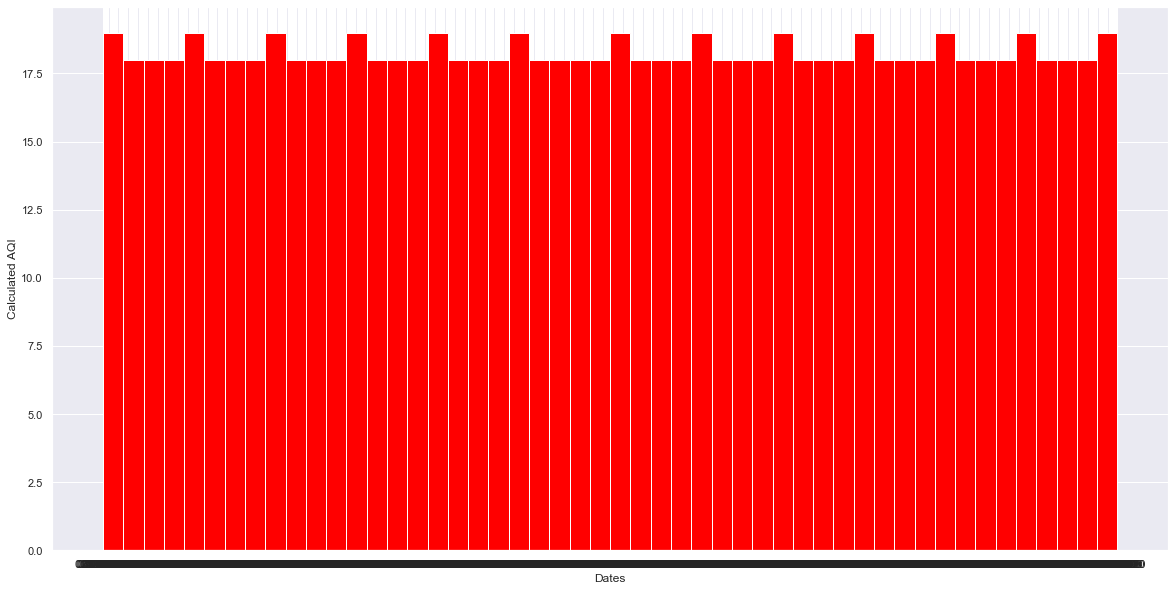

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10)) 
x = data["Date"] 
plt.hist(x, bins = 50, color = "red") 
y= data["Calculated_AQI"] 
plt.xlabel("Dates") 
plt.ylabel("Calculated AQI") 
plt.show()

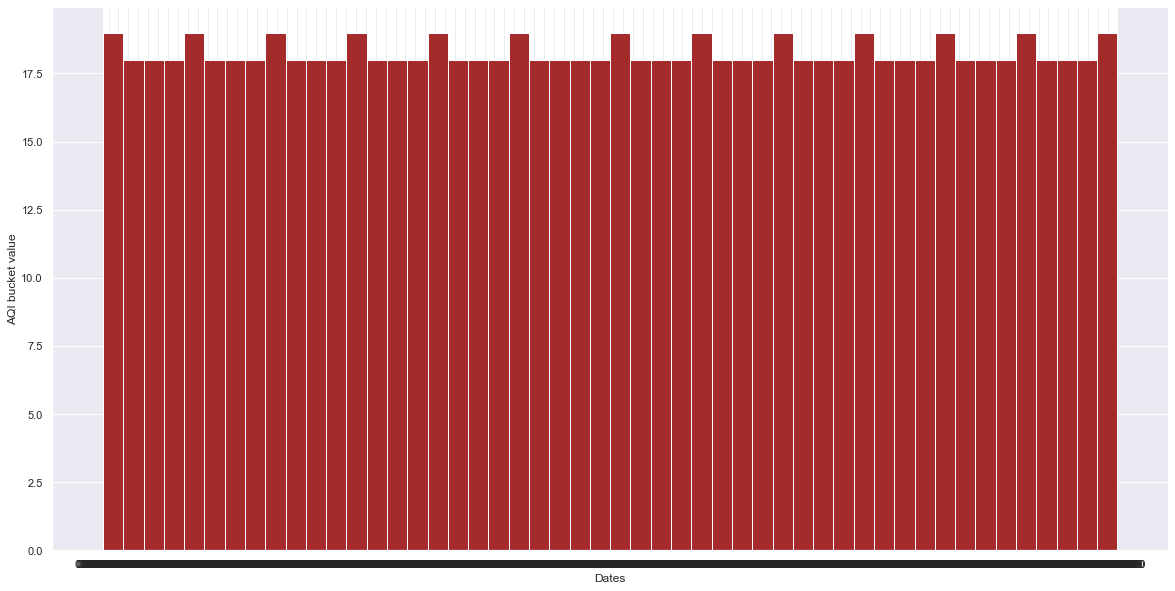

In [151]:
plt.figure(figsize = (20,10)) 
x = data["Date"] 
plt.hist(x, bins = 50, color = "brown") 
y= data["AQI_Bucket_calculated"] 
plt.xlabel("Dates") 
plt.ylabel("AQI bucket value") 
plt.show()

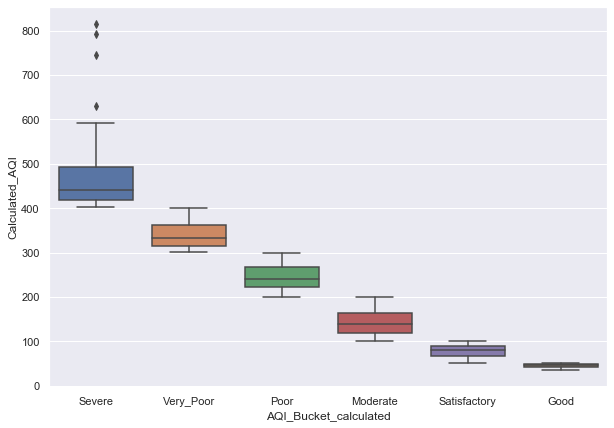

In [152]:
import seaborn as sns
sns.set()
sns.boxplot(x=data["AQI_Bucket_calculated"],y=data["Calculated_AQI"],data=data)

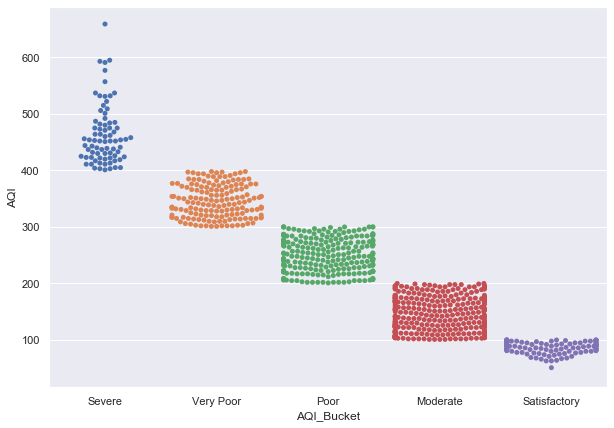

In [153]:
sns.set()
sns.swarmplot(x=data["AQI_Bucket"],y=data["AQI"],data=data)



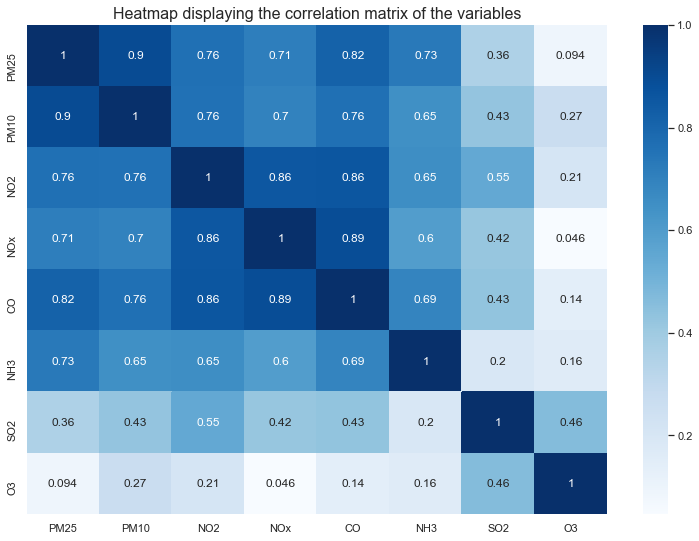

In [154]:
#HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(13,9))
correlation_data = data[['PM25', 'PM10', 'NO2','NOx','CO', 'NH3', 'SO2', 'O3']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [155]:
data=data[['Calculated_AQI','Date']]
data["Date"] = pd.to_datetime(data['Date'])
data.tail(20)

,Calculated_AQI,Date
893,135.133333,2020-12-06
894,119.553333,2020-06-13
895,136.933333,2020-06-14
896,113.486667,2020-06-15
897,105.326667,2020-06-16
898,92.580000,2020-06-17
899,100.413333,2020-06-18
900,170.373333,2020-06-19
901,105.820000,2020-06-20
902,95.630000,2020-06-21


In [156]:
#Calculating the yearly mean for the data 
data=data.set_index('Date').resample('M')["Calculated_AQI"].mean()
data.head()

Date
2018-01-31    297.756071
2018-02-28    260.057793
2018-03-31    221.553424
2018-04-30    242.805442
2018-05-31    235.402239
Freq: M, Name: Calculated_AQI, dtype: float64

In [157]:
data.dtypes

dtype('float64')

In [158]:
data=pd.get_dummies(df,drop_first=True)
data.head()

,si,ni,pm,no,nh,co,o3,pm10,AQI,Calculated_AQI,...,Date_31-12-2019,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor,AQI_Bucket_calculated_Moderate,AQI_Bucket_calculated_Poor,AQI_Bucket_calculated_Satisfactory,AQI_Bucket_calculated_Severe,AQI_Bucket_calculated_Very_Poor
0,23.2250,112.4000,441.084615,14.7375,18.2900,90.0,68.75,381.3625,462,441.084615,...,0,0,0,1,0,0,0,0,1,0
1,15.5375,99.6625,421.138462,5.3250,13.9025,76.0,68.68,390.7375,439,421.138462,...,0,0,0,1,0,0,0,0,1,0
2,12.8500,97.8000,374.623077,3.5875,12.7025,64.5,54.94,286.8700,405,374.623077,...,0,0,0,1,0,0,0,0,0,1
3,18.0250,109.4625,398.876923,5.3000,13.7925,68.0,66.31,334.5125,394,398.876923,...,0,0,0,0,1,0,0,0,0,1
4,16.5000,101.0000,392.630769,5.7125,12.8400,69.0,48.57,313.7375,398,392.630769,...,0,0,0,0,1,0,0,0,0,1


In [159]:
data.columns

Index(['si', 'ni', 'pm', 'no', 'nh', 'co', 'o3', 'pm10', 'AQI',
       'Calculated_AQI',
       ...
       'Date_31-12-2019', 'AQI_Bucket_Poor', 'AQI_Bucket_Satisfactory',
       'AQI_Bucket_Severe', 'AQI_Bucket_Very Poor',
       'AQI_Bucket_calculated_Moderate', 'AQI_Bucket_calculated_Poor',
       'AQI_Bucket_calculated_Satisfactory', 'AQI_Bucket_calculated_Severe',
       'AQI_Bucket_calculated_Very_Poor'],
      dtype='object', length=931)

In [160]:
col=['si', 'ni', 'pm', 'no', 'nh', 'co', 'o3', 'pm10', 'AQI',
       'Calculated_AQI','Date_31-12-2019', 'AQI_Bucket_Poor', 'AQI_Bucket_Satisfactory',
       'AQI_Bucket_Severe', 'AQI_Bucket_Very Poor',
       'AQI_Bucket_calculated_Moderate', 'AQI_Bucket_calculated_Poor',
       'AQI_Bucket_calculated_Satisfactory', 'AQI_Bucket_calculated_Severe',
       'AQI_Bucket_calculated_Very_Poor']

# Linear regression

In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [163]:
data["Calculated_AQI"]=data["Calculated_AQI"].astype(int)

In [164]:
X= data[['si','ni','pm','no','nh','co','o3','pm10']]
y= data["Calculated_AQI"]
y.head()

0    441
1    421
2    374
3    398
4    392
Name: Calculated_AQI, dtype: int32

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19,shuffle=False)

In [166]:
X_train.head()

,si,ni,pm,no,nh,co,o3,pm10
0,23.2250,112.4000,441.084615,14.7375,18.2900,90.0,68.75,381.3625
1,15.5375,99.6625,421.138462,5.3250,13.9025,76.0,68.68,390.7375
2,12.8500,97.8000,374.623077,3.5875,12.7025,64.5,54.94,286.8700
3,18.0250,109.4625,398.876923,5.3000,13.7925,68.0,66.31,334.5125
4,16.5000,101.0000,392.630769,5.7125,12.8400,69.0,48.57,313.7375


In [167]:
LR = LinearRegression() 
LR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
print('Intercept',LR.intercept_)

Intercept 58.50606505832036


In [169]:
print('Coefficients',LR.coef_)

Coefficients [-0.58789587 -0.05326256  0.70813863 -0.11906271 -2.23099392 -0.44745545
 -0.0448844   0.49380557]


In [170]:
predictions = LR.predict(X_test)

In [171]:
predictions

array([289.73700061, 302.30522779, 348.90021507, 360.16057894,
       262.7549347 , 255.00569502, 293.02029142, 243.01498661,
       282.27898764, 293.89949458, 302.73583135, 376.89031769,
       342.09052241, 172.28440468, 180.57952305, 291.35409166,
       340.94882396, 348.50291343, 228.35838551, 163.27971731,
       210.26765307, 212.6838852 , 263.42479377, 285.10628719,
       296.70961355, 346.48055501, 310.78424711, 280.50937848,
       302.28189668, 308.13962896, 308.37224263, 331.92547915,
       330.63895235, 339.949562  , 223.56925077, 179.08099681,
       193.59762001, 287.7753051 , 312.82000197, 282.78137833,
       290.19726976, 243.89561414, 109.28497212, 126.24676485,
       238.30699238, 151.63200276, 288.36124746, 296.1009528 ,
       248.50229428, 192.98209704, 129.01128452,  93.86676208,
       217.15149005, 193.57799849, 190.59733012,  76.39091674,
        50.89488397,  96.67295673, 155.61357851, 135.70815341,
       198.92733106, 124.06179435, 132.57989926, 173.48

Text(0, 0.5, 'Predicted Y')

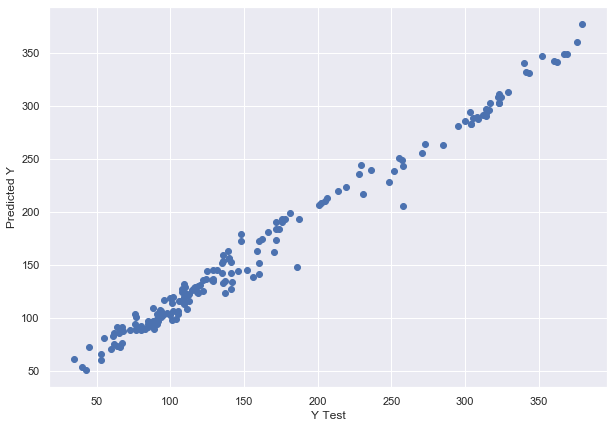

In [172]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [173]:
LR.score(X_test,y_test)

0.973035930779591

# Lasso regression

In [174]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:0.97 
MSE:15.02 


In [175]:
from sklearn.linear_model import Lasso

In [176]:
a=Lasso(alpha=0.5)
a.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [177]:
print("R^2 on train set : {}".format(a.score(X_train, y_train)))

R^2 on train set : 0.9827760179311137


In [198]:
print("R^2 on test set : {}".format(a.score(X_test, y_test)))
a.predict(X_test)


R^2 on test set : 0.9728041607373017


array([289.17899175, 301.89830945, 348.65768376, 360.17589899,
       262.79466126, 254.84067955, 292.88333499, 242.87189281,
       281.87437946, 293.48302609, 302.31067751, 376.70430235,
       341.7490448 , 172.23742906, 180.37519468, 291.05750616,
       340.79054939, 348.6803611 , 228.37326343, 163.228468  ,
       210.05890134, 212.31580615, 262.88551425, 284.55368349,
       296.12111345, 346.12319353, 310.47530143, 280.01882705,
       301.85162456, 307.94563866, 308.12026292, 331.59342823,
       330.1454189 , 339.78839612, 223.67290334, 179.11549165,
       193.63206934, 287.73635872, 312.83398928, 282.86122959,
       290.2709151 , 243.87050278, 109.39458514, 126.27418688,
       238.17057219, 151.75166699, 288.39381092, 296.10245993,
       248.65385829, 193.15309475, 129.16700425,  93.82076737,
       217.13860219, 193.65344187, 190.73328223,  76.50175383,
        50.86824308,  96.6149162 , 155.44492396, 135.71312394,
       198.90167216, 124.23492449, 132.87008794, 173.52

In [199]:
a.score(X_test, y_test)

0.9728041607373017

# Decision tree classifier

In [62]:
data=pd.read_csv("E:\Delhi.csv")

In [63]:
X1= data[['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']]
y1= df['AQI_Bucket_calculated']

In [64]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.19,shuffle=False)

In [65]:
from sklearn import tree

In [66]:
model = tree.DecisionTreeClassifier()

In [67]:
model.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
model.score(X_test1,y_test1)

1.0

predictions......

In [69]:
model.predict([[117.98,145.85,26.65,38.64,45.09,44.73,1.13,8.67,17.63 ]]) #correct

array(['Poor'], dtype=object)

In [70]:
model.predict([[29.70,79.04,8.38,18.56,16.51,23.41,0.56,12.85,45.80]]) #correct

array(['Satisfactory'], dtype=object)

In [71]:
model.predict([[44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61]])#correct

array(['Moderate'], dtype=object)

In [72]:
model.predict([[117.98,145.85,26.65,38.64,45.09,44.73,1.13,8.67,17.63]])#correct

array(['Poor'], dtype=object)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
X1= data[['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']]
y1= df['AQI_Bucket_calculated']

In [78]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.19,shuffle=False)

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train1,y_train1)

E:\ProgramFiles\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
logmodel.score(X_test1,y_test1)

0.7586206896551724

In [81]:
predictions = logmodel.predict(X_test1)

In [82]:
logmodel.score(X_test1,y_test1) 

0.7586206896551724

In [83]:
logmodel.predict([[44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61]]) #wrong

array(['Poor'], dtype=object)

In [84]:
logmodel.predict([[21.23,34.15,9.87,17.52,18.34,25.22,0.54,10.28,25.06 ]]) #correct

array(['Good'], dtype=object)

In [85]:
logmodel.predict([[117.98,145.85,26.65,38.64,45.09,44.73,1.13,8.67,17.63]]) #wrong

array(['Very_Poor'], dtype=object)

# Using Random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
model.score(X_test1,y_test1)

0.9597701149425287

predictions...

In [89]:
model.predict([[44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61]])#correct

array(['Moderate'], dtype=object)

In [90]:
model.predict([[21.23,34.15,9.87,17.52,18.34,25.22,0.54,10.28,25.06]])#correct

array(['Good'], dtype=object)

In [91]:
model.predict([[117.98,145.85,26.65,38.64,45.09,44.73,1.13,8.67,17.63]])#correct

array(['Poor'], dtype=object)

In [92]:
model.predict([[44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61 ]]) #correct

array(['Moderate'], dtype=object)

# Conclusions.............

 1- AQI has been increasing over the years.
 2- Decision Tree Classifier model has the most accuracy out of all models.